In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist= tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [4]:
x_train= tf.keras.utils.normalize(x_train,axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)

In [5]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5)
model.save('handwritten.model')

Epoch 1/5


1875/1875 [==============================] - 14s 7ms/step - loss: 0.2656 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1116 - accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0759 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0531 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0399 - accuracy: 0.9870
INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [8]:
model=tf.keras.models.load_model('handwritten.model')
loss, accuracy= model.evaluate(x_test,y_test)
print (loss)


313/313 [==============================] - 2s 4ms/step - loss: 0.0975 - accuracy: 0.9718
0.09751047194004059


In [9]:
print (accuracy)

0.9718000292778015


In [10]:
current_directory = os.getcwd()
new_directory = "C:\\Users\\kondu\\OneDrive\\Pictures\\Screenshots\\ml"
os.chdir(new_directory)
new_directory

'C:\\Users\\kondu\\OneDrive\\Pictures\\Screenshots\\ml'

1/1 [==============================] - 0s 39ms/step
This digit is probably a 0


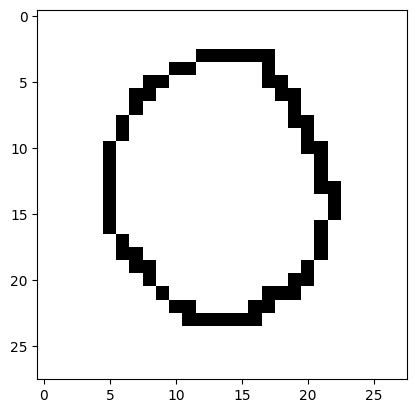

1/1 [==============================] - 0s 32ms/step
This digit is probably a 1


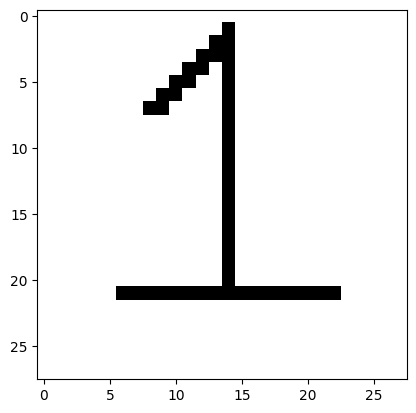

1/1 [==============================] - 0s 33ms/step
This digit is probably a 2


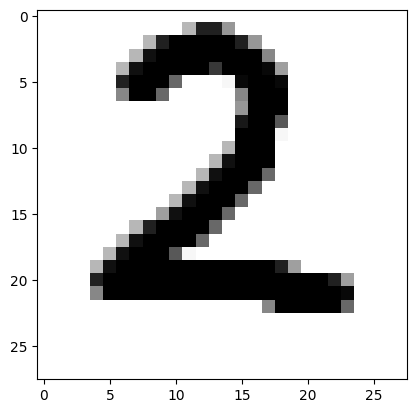

1/1 [==============================] - 0s 50ms/step
This digit is probably a 3


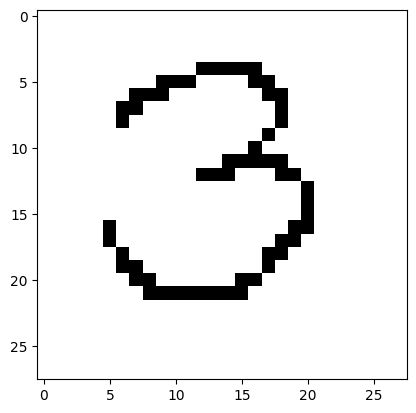

1/1 [==============================] - 0s 50ms/step
This digit is probably a 4


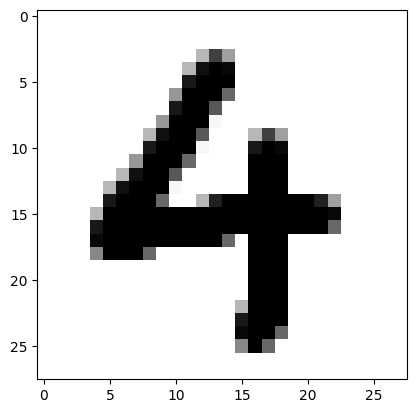

1/1 [==============================] - 0s 41ms/step
This digit is probably a 5


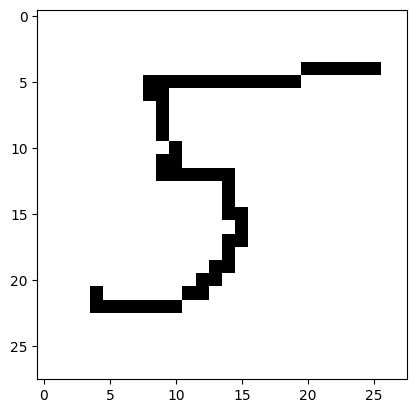

1/1 [==============================] - 0s 41ms/step
This digit is probably a 6


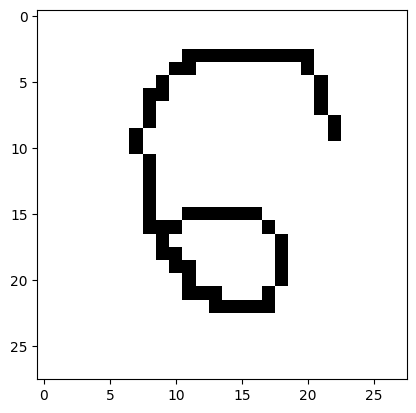

1/1 [==============================] - 0s 50ms/step
This digit is probably a 7


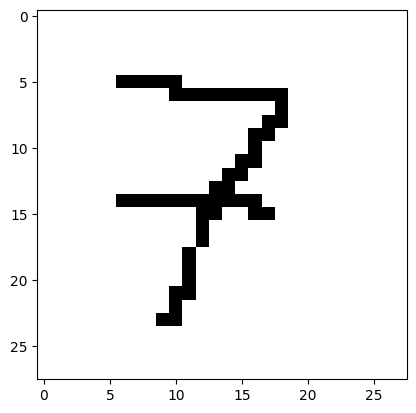

1/1 [==============================] - 0s 58ms/step
This digit is probably a 8


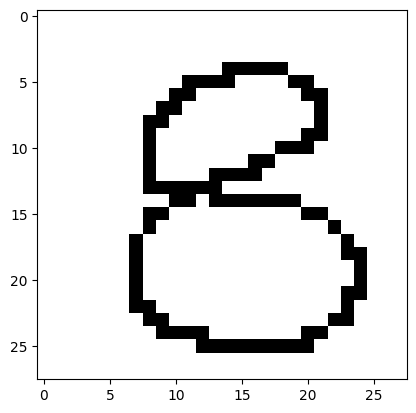

1/1 [==============================] - 0s 32ms/step
This digit is probably a 9


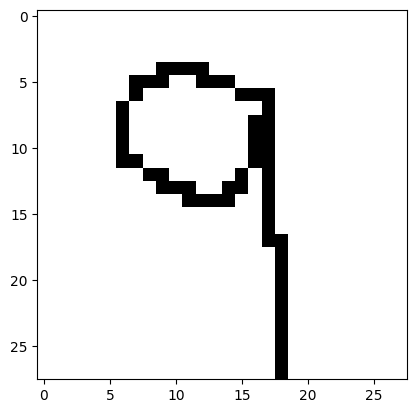

In [13]:

# Initialize image number
image_number = 0

# Loop through images in the directory
while os.path.isfile(f"{image_number}.png"):
    try:
        # Read the image in grayscale mode
        img = cv2.imread(f"{image_number}.png", cv2.IMREAD_GRAYSCALE)

        # Invert the image colors (optional)
        img = np.invert(img)

        # Normalize the image and reshape if required by your model
        img = np.array([img])

        # Predict using your model (ensure 'model' is defined elsewhere in your code)
        prediction = model.predict(img)

        # Output the prediction
        print(f"This digit is probably a {np.argmax(prediction)}")

        # Display the image using matplotlib
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()

    except Exception as e:
        print(f"Error processing image {image_number}: {e}")

    finally:
        image_number += 1


Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.0861 - val_accuracy: 0.9745
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0253 - accuracy: 0.9913 - val_loss: 0.0964 - val_accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.0944 - val_accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.1032 - val_accuracy: 0.9764
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1174 - accuracy: 0.9749
Test Loss: 0.11743909865617752, Test Accuracy: 0.9749000072479248


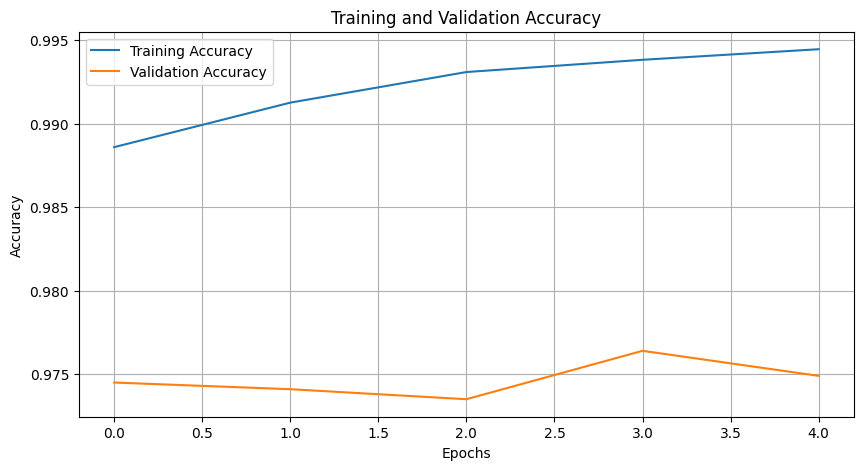

In [14]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
